<!-- <center>
<h2>
MALLORN Astronomical Classification
</h2>
</center>

<center>
<h2></h2>
<h3></h3>
<h3></h3>
<h3>
Rasmus Eliasson & Oskar Flodin
</h3>
<img src="bth.png" width="100">

<h5>
    M.Sc. Eng. in AI & Machine Learning <br>
    DIDA, Blekinge Institute of Technology<br>
    Karlskrona, Sweden
</h5>

<mail>rael23@student.bth.se <br>
osfl22@student.bth.se</mail>

<p>2025-12-12</p>
</center>
 -->

 <h2 style="text-align:center;">MALLORN Astronomical Classification</h2>

<h3 style="text-align:center;">Rasmus Eliasson & Oskar Flodin</h3>

<div style="text-align:center;">
    <img src="bth.png" width="100">
    <h5 style="margin:4px 0; line-height:1.2;">
        M.Sc. Eng. in AI & Machine Learning<br>
        DIDA, Blekinge Institute of Technology
    </h5>
    <h5 style="margin:4px 0;">Karlskrona, Sweden</h5>
    <a href="mailto:rael23@student.bth.se">rael23@student.bth.se</a><br>
    <a href="mailto:osfl22@student.bth.se">osfl22@student.bth.se</a>
    <p style="text-align:center;">
</div>



<center>
<h2>
    Traditional Machine Learning Approach - Pre processing
</h2>
</center>


In [ ]:
import os
import pandas as pd
import numpy as np
import extract_data as ed
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
data_path = os.path.join(os.getcwd(), data_folder)
re_extract_data = False

path = os.path.join(os.getcwd(), main_folder)


# data_paths_list = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]


base_path = os.path.join(os.getcwd(), "mallorn-astronomical-classification-challenge")

split_paths = [
    os.path.join(base_path, d)
    for d in os.listdir(base_path)
    if d.startswith("split_") and os.path.isdir(os.path.join(base_path, d))
]

split_map = {
    os.path.basename(p): p
    for p in split_paths
}



In [ ]:



def Null_check_func(split_name):
    split_path = split_map[split_name]

    split_train = pd.read_csv(
        os.path.join(split_path, "train_full_lightcurves.csv")
    )
    split_test = pd.read_csv(
        os.path.join(split_path, "test_full_lightcurves.csv")
    )

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    sns.heatmap(
        split_train.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[0]
    )
    axes[0].set_title(f"Check for train NULLs in {split_name}")

    sns.heatmap(
        split_test.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[1]
    )
    axes[1].set_title(f"Check for test NULLs in {split_name}")

    plt.show();


widgets.interact(
    Null_check_func,
    split_name=widgets.Dropdown(options=sorted(split_map.keys()))
);


interactive(children=(Dropdown(description='split_name', options=('split_01', 'split_02', 'split_03', 'split_0…

In [ ]:

if re_extract_data:
    df_train, df_test = ed.merge_and_save_data()
else:
    df_train = pd.read_csv(os.path.join(data_path, "MALLORN-data_train.csv"), sep=',')
    df_test = pd.read_csv(os.path.join(data_path, "MALLORN-data_test.csv"), sep=',')

# df_train

,object_id,n_obs_u,mean_flux_u,std_flux_u,max_flux_u,min_flux_u,mean_flux_err_u,t_span_u,mean_snr_u,t_peak_u,...,mean_snr_y,t_peak_y,flux_peak_y,Z,Z_err,EBV,SpecType,English Translation,split,target
0,Dornhoth_fervain_onodrim,5.0,0.584015,1.143333,2.626294,0.000435,0.423282,849.3841,1.156345,63780.9674,...,-0.285600,63789.7693,5.866250,3.0490,NaN,0.110,AGN,Trawn Folk (Dwarfs) + northern + Ents (people),split_01,0
1,Dornhoth_galadh_ylf,15.0,0.027015,0.564220,1.060514,-0.799254,0.397145,2246.6157,-0.025197,61920.5694,...,0.704376,62749.8915,11.375499,0.4324,NaN,0.058,SN II,Trawn Folk (Dwarfs) + tree + drinking vessel,split_01,0
2,Elrim_melethril_thul,5.0,0.006054,0.327705,0.367624,-0.427984,0.267160,498.8939,0.122734,64397.2454,...,0.035350,64026.3286,6.466151,0.4673,NaN,0.577,AGN,Elves + lover (fem.) + breath,split_01,0
3,Ithil_tobas_rodwen,108.0,0.152980,0.441287,1.607904,-1.455301,0.342211,2858.4129,0.536586,63870.0125,...,0.439232,63824.1863,5.353821,0.6946,NaN,0.012,AGN,moon + roof + noble maiden,split_01,0
4,Mirion_adar_Druadan,13.0,-0.014067,0.423009,0.530415,-0.828860,0.367133,1859.9219,0.153701,62239.7643,...,0.497791,62666.0884,2.370519,0.4161,NaN,0.058,AGN,"jewel, Silmaril + father + Wild Man",split_01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,tinnu_gellui_tathar,16.0,-0.068665,0.408578,0.460519,-0.825168,0.411151,2189.5612,-0.144973,63868.7902,...,0.590448,63697.8976,6.428462,0.8898,NaN,0.042,AGN,"dusk, twilight + triumphant + tathar",split_20,0
3039,uir_heleg_corf,13.0,1.134710,2.103765,4.516102,-2.843739,0.450983,2887.8277,2.787755,62885.8048,...,0.451297,62967.6843,2.439463,0.9598,NaN,0.042,AGN,eternity + ice + ring,split_20,0
3040,uir_rhosc_law,16.0,0.041323,0.497076,1.274287,-0.979264,0.332058,1829.4130,0.279995,63918.6813,...,0.250084,63881.0046,5.085714,0.1543,NaN,0.024,SN II,"eternity + russet, red, brown + no! don't!",split_20,0
3041,uruk_in_pess,13.0,0.703543,1.089703,1.736021,-2.024119,0.362239,2568.6786,2.231226,62893.9933,...,0.287187,62574.5896,2.813707,1.1520,NaN,0.019,AGN,evil creature + year + feather,split_20,0


In [ ]:
exclude_cols = [
    "English Translation",
    "object_id",
    "split",
    "SpecType",
    "target"
]
common_cols = sorted(
    set(df_train.columns).intersection(df_test.columns) - set(exclude_cols)
)

df_train = df_train.dropna(axis=1, how="all")
df_test  = df_test.dropna(axis=1, how="all")

def attribute_func(Attribute):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    if Attribute in df_train.columns:
        sns.boxplot(data=df_train[[Attribute]], ax=axes[0], color="darkred")
    axes[0].set_title(f"Dataset Train: {Attribute}")
    axes[0].set_xlabel("")

    if (Attribute in df_test.columns and Attribute not in exclude_cols):
        sns.boxplot(data=df_test[[Attribute]], ax=axes[1], color="darkred")
    axes[1].set_title(f"Dataset Test: {Attribute}")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()

widgets.interact(attribute_func, Attribute=common_cols);

interactive(children=(Dropdown(description='Attribute', options=('EBV', 'Z', 'Z_err', 'flux_peak_g', 'flux_pea…

In [ ]:
# all_cols[-1]

'target'

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Dropdown, VBox, interactive_output

# --------------------------------------------------
# Assumes df_train and df_test already exist
# --------------------------------------------------

df_map = {
    "train": df_train,
    "test": df_test
}

# --------------------------------------------------
# Helper: create column intervals
# --------------------------------------------------
def make_intervals(df, group_size=6):
    intervals = []
    n_cols = len(df.columns)

    for i in range(0, n_cols, group_size):
        start = i + 1
        end = min(i + group_size, n_cols)
        intervals.append(f"{start}-{end}")

    return intervals


def get_intervals(dataset):
    return make_intervals(df_map[dataset], group_size=6)

# --------------------------------------------------
# Plot function (controlled by widgets)
# --------------------------------------------------
def histo_plot(dataset, interval):
    df = df_map[dataset]

    start, end = map(int, interval.split("-"))
    cols = df.columns[start - 1:end]

    df[cols].hist(bins="auto", figsize=(12, 8))
    plt.suptitle(
        f"{dataset.upper()} histograms — columns {interval}",
        fontsize=18
    )
    plt.tight_layout()
    plt.show()

# --------------------------------------------------
# Widgets
# --------------------------------------------------
dataset_widget = Dropdown(
    options=["train", "test"],
    value="train",
    description="Dataset:"
)

interval_widget = Dropdown(
    description="Interval:"
)

# Update interval options when dataset changes
def update_intervals(change):
    interval_widget.options = get_intervals(change["new"])
    interval_widget.value = interval_widget.options[0]

dataset_widget.observe(update_intervals, names="value")
update_intervals({"new": dataset_widget.value})  # initialize

# --------------------------------------------------
# Layout & display
# --------------------------------------------------
ui = VBox([dataset_widget, interval_widget])

out = interactive_output(
    histo_plot,
    {
        "dataset": dataset_widget,
        "interval": interval_widget
    }
)

display(ui, out)


Output()

In [44]:
# print(df_train.columns.tolist())
# # df_test

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# --------------------------------------------------
# Assumes df_train already exists and includes `target`
# --------------------------------------------------

features = df_train.copy()

# --------------------------------------------------
# 1. Create amplitude features (per filter)
# --------------------------------------------------
bands = ["u", "g", "r", "i", "z", "y"]

for band in bands:
    max_col = f"max_flux_{band}"
    min_col = f"min_flux_{band}"
    if max_col in features.columns and min_col in features.columns:
        features[f"amplitude_{band}"] = features[max_col] - features[min_col]

# --------------------------------------------------
# 2. Get numeric feature list (exclude target)
# --------------------------------------------------
numeric_features = (
    features
    .select_dtypes(include="number")
    .columns
    .drop("target", errors="ignore")
)

# --------------------------------------------------
# 3. Plot function (distribution + reference scatter)
# --------------------------------------------------
def feature_distribution_vs_class(feature, reference):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    display_name = feature.replace("_", " ").title()
    reference_name = reference.replace("_", " ").title()

    # ---- Left: distribution by class ----
    sns.histplot(
        data=features,
        x=feature,
        hue="target",
        bins="auto",
        element="step",
        kde=False,
        ax=axes[0]
    )

    axes[0].set_title(f"Distribution of {display_name} by Class")
    axes[0].set_xlabel(display_name)
    axes[0].set_ylabel("Count")

    # ---- Right: feature vs reference ----
    sns.scatterplot(
        data=features,
        x=feature,
        y=reference,
        hue="target",
        alpha=0.6,
        ax=axes[1]
    )

    axes[1].set_title(f"{display_name} vs {reference_name}")
    axes[1].set_xlabel(display_name)
    axes[1].set_ylabel(reference_name)

    fig.tight_layout()
    plt.show()

# --------------------------------------------------
# 4. Interactive widgets
# --------------------------------------------------
widgets.interact(
    feature_distribution_vs_class,
    feature=widgets.Dropdown(
        options=numeric_features,
        description="Feature:"
    ),
    reference=widgets.Dropdown(
        options=numeric_features,
        description="Reference:"
    )
);


interactive(children=(Dropdown(description='Feature:', options=('n_obs_u', 'mean_flux_u', 'std_flux_u', 'max_f…

In [ ]:
# # attribute distribution vs spam.
# def attribute_distribution_vs_spam(attribute):
#     fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#     # For a bit cleaner output labels.
#     display_name = attribute
#     if attribute.startswith("word_freq_"):
#         display_name = attribute.replace("word_freq_", "word ")
#     elif attribute.startswith("char_freq_"):
#         display_name = attribute.replace("char_freq_", "char ")

#     # Left subplot.
#     sns.histplot(
#         data=df, x=attribute, hue="spam",
#         bins='auto', kde=False, ax=axes[0]
#     )
#     axes[0].set_title(f"Distribution of {display_name} by Spam Class")
#     axes[0].set_xlabel(display_name)
#     axes[0].set_ylabel("Count")

#     # Right subplot.
#     sns.scatterplot(
#         data=df,
#         x=attribute,
#         y="capital_run_length_total",
#         hue="spam",
#         alpha=0.6,
#         ax=axes[1],
#         palette={0:"blue", 1:"red"}
#     )
#     axes[1].set_title(f"{display_name} vs capital run length total")
#     axes[1].set_xlabel(f"Frequency of {display_name}")
#     axes[1].set_ylabel("Total Length of Capital Letter Sequences")
#     fig.tight_layout()
#     plt.show()


# widgets.interact(attribute_distribution_vs_spam, attribute = df.columns.drop());


In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install extinction==0.4.7




main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
path = os.path.join(os.getcwd(), main_folder)
# Path to your main folder

# Get all unique directories
Data_dict = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# print("Unique directories found:")
# for d in Data_dict:
#     print(d)

path = os.path.join(os.getcwd(), main_folder)
path2 = os.path.join(path, 'split_01')
# print(path)
df_split1 = pd.read_csv(os.path.join(path2, "train_full_lightcurves.csv"), sep = ',')

df = df_split1.copy()

#Setting filter colours for later plotting
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}


#Define name of chosen object
# object_ID = 'amon_imloth_luin'
object_ID = 'Dornhoth_fervain_onodrim'

#Creating masks to isolate data for chosen lightcurve and split according to filter
u_mask = ((df['Filter'] == 'u') & (df['object_id'] == object_ID))
g_mask = ((df['Filter'] == 'g') & (df['object_id'] == object_ID))
r_mask = ((df['Filter'] == 'r') & (df['object_id'] == object_ID))
i_mask = ((df['Filter'] == 'i') & (df['object_id'] == object_ID))
z_mask = ((df['Filter'] == 'z') & (df['object_id'] == object_ID))
y_mask = ((df['Filter'] == 'y') & (df['object_id'] == object_ID))

#Saving fluxes, times and error values for the object split according to filter
u_flux = np.array(df.loc[u_mask, 'Flux']); u_time = np.array(df.loc[u_mask, 'Time (MJD)']); u_err = np.array(df.loc[u_mask, 'Flux_err'])
g_flux = np.array(df.loc[g_mask, 'Flux']); g_time = np.array(df.loc[g_mask, 'Time (MJD)']); g_err = np.array(df.loc[g_mask, 'Flux_err'])
r_flux = np.array(df.loc[r_mask, 'Flux']); r_time = np.array(df.loc[r_mask, 'Time (MJD)']); r_err = np.array(df.loc[r_mask, 'Flux_err'])
i_flux = np.array(df.loc[i_mask, 'Flux']); i_time = np.array(df.loc[i_mask, 'Time (MJD)']); i_err = np.array(df.loc[i_mask, 'Flux_err'])
z_flux = np.array(df.loc[z_mask, 'Flux']); z_time = np.array(df.loc[z_mask, 'Time (MJD)']); z_err = np.array(df.loc[z_mask, 'Flux_err'])
y_flux = np.array(df.loc[y_mask, 'Flux']); y_time = np.array(df.loc[y_mask, 'Time (MJD)']); y_err = np.array(df.loc[y_mask, 'Flux_err'])

NameError: name 'df' is not defined

                  object_id      Z  Z_err   EBV SpecType  \
0  Dornhoth_fervain_onodrim  3.049    NaN  0.11      AGN   

                               English Translation     split  target  
0  Trawn Folk (Dwarfs) + northern + Ents (people)   split_01       0  
u band extinction = [0.52232173]
g band extinction = [0.41492566]
r band extinction = [0.28512226]
i band extinction = [0.209827]
z band extinction = [0.16377872]
y band extinction = [0.12726912]


C:\Users\rasmu\AppData\Local\Temp\ipykernel_23564\42776058.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value


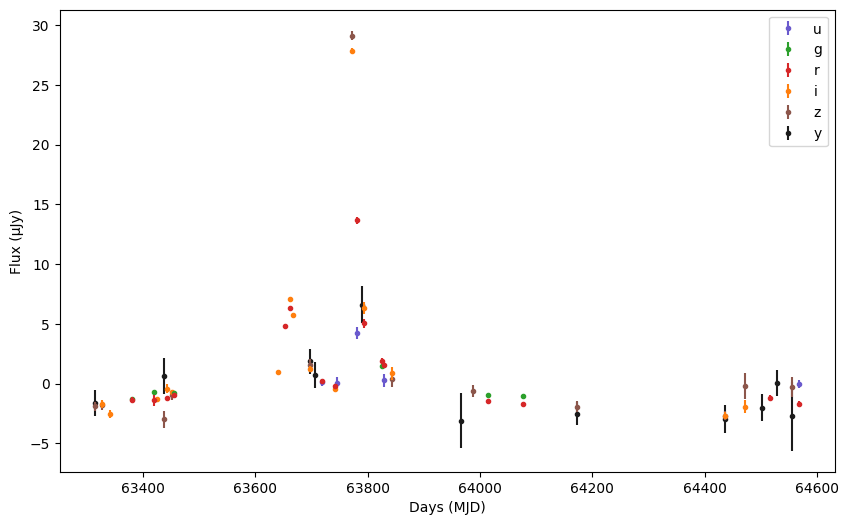

In [ ]:
#Loading in log data file
# log_path = '/content/rubin_sim_data/train_log_tutorial.csv'
log_path = 'train_log.csv'

log_df = pd.read_csv(os.path.join(path, log_path))

#Selecting only the data relevant to the chosen object
object_log = log_df.loc[log_df['object_id'] == object_ID]
print(object_log)

#Defining the redshift of that object
redshift = object_log['Z']

#redshift_err = object_log['Z_err']
#For training set, it is a spectroscopically determined redshift (with negligible error).
#For testing set, it will be a photometrically determined redahift and will have an error value that can be loaded in using the above line.

ebv = object_log['EBV']
#Loading in the extinction coefficient value
#Dust in the Milky Way can obscure the light from a distant object. The amount of extinction is dependent on the position of the object relative to us and the wavelength of light.
#The extinction coefficient (EBV) value is given in the log data to simplify the de-extinction process.

SpecType = object_log['SpecType']
#For the training set, the type of the object will be listed in the 'SpecType' column
#For the testing set, this value will not be present


########################################################
########################################################
########################################################


#Importing necessary package
from extinction import fitzpatrick99

#Defining function to de-extinct a set of flux values
def jurassic_park (flux, eff_wl):
    A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value
    flux_ext = flux * 10**((A_lambda)/2.5)
    return flux_ext, A_lambda


########################################################
########################################################
########################################################

#Effective wavelength for each band - sourced from SVO Filter Profile Service
u_eff_wl = np.array([3641]); g_eff_wl = np.array([4704]); r_eff_wl = np.array([6155])
i_eff_wl = np.array([7504]); z_eff_wl = np.array([8695]); y_eff_wl = np.array([10056])

#De-extincting lightcurves
u_flux, u_A_lambda = jurassic_park(u_flux,u_eff_wl); g_flux, g_A_lambda = jurassic_park(g_flux,g_eff_wl)
r_flux, r_A_lambda = jurassic_park(r_flux,r_eff_wl); i_flux, i_A_lambda = jurassic_park(i_flux,i_eff_wl)
z_flux, z_A_lumbda = jurassic_park(z_flux,z_eff_wl); y_flux, y_A_lambda = jurassic_park(y_flux,y_eff_wl)

print(f'u band extinction = {u_A_lambda}'); print(f'g band extinction = {g_A_lambda}'); print(f'r band extinction = {r_A_lambda}')
print(f'i band extinction = {i_A_lambda}'); print(f'z band extinction = {z_A_lumbda}'); print(f'y band extinction = {y_A_lambda}')

########################################################
########################################################
########################################################

plt.figure(figsize = [10,6])
plt.errorbar(u_time,u_flux, yerr= u_err,label='u', fmt = '.',color = filter_colours['u'],zorder=4)
plt.errorbar(g_time,g_flux,yerr=g_err, label='g', fmt = '.', color = filter_colours['g'],zorder=5)
plt.errorbar(r_time,r_flux,yerr = r_err, label='r', fmt = '.', color = filter_colours['r'],zorder=6)
plt.errorbar(i_time,i_flux,yerr = i_err, label='i', fmt = '.', color = filter_colours['i'],zorder=3)
plt.errorbar(z_time,z_flux,yerr = z_err, label='z', fmt = '.', color = filter_colours['z'],zorder=2)
plt.errorbar(y_time,y_flux,yerr = y_err, label='y', fmt = '.', color = filter_colours['y'],zorder=1)
plt.xlabel('Days (MJD)')
plt.ylabel('Flux (μJy)')
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

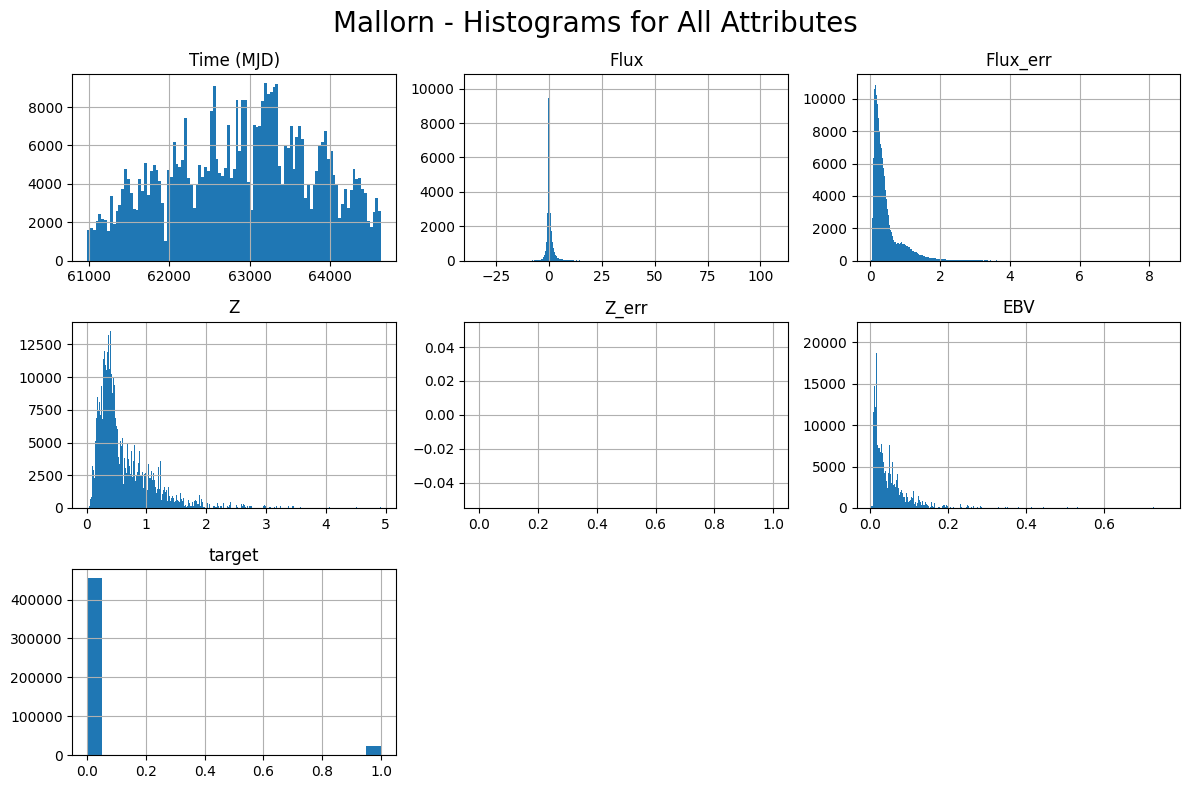

In [ ]:
# data = pd.merge()
data = df.merge(log_df, on="object_id") #, drop = 'English Translation	')

# log_df
# df_split1
# data.head(10)


plt.figure(figsize=(20,10));
data.hist(bins='auto', figsize=(12,8));
plt.suptitle("Mallorn - Histograms for All Attributes", fontsize=20);
plt.tight_layout();
plt.show();


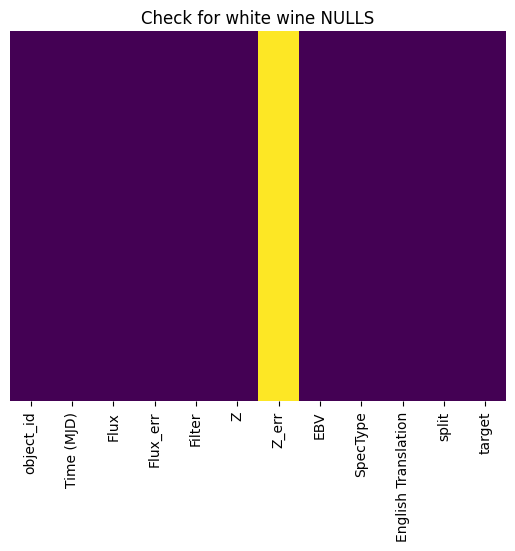

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');
plt.title("Check for white wine NULLS")
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# attributes = data[columns]
exclude = ['object_id']
attributes = [c for c in data.columns if c not in exclude]


def attribute_func(Atribute):
    plt.figure(figsize=(10, 4))
    sns.boxplot(
        color="darkred",
        data = data[Atribute]
    )
    plt.title(f"{Atribute}")
    plt.tight_layout()


widgets.interact(attribute_func, Atribute = attributes);

interactive(children=(Dropdown(description='Atribute', options=('Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z…

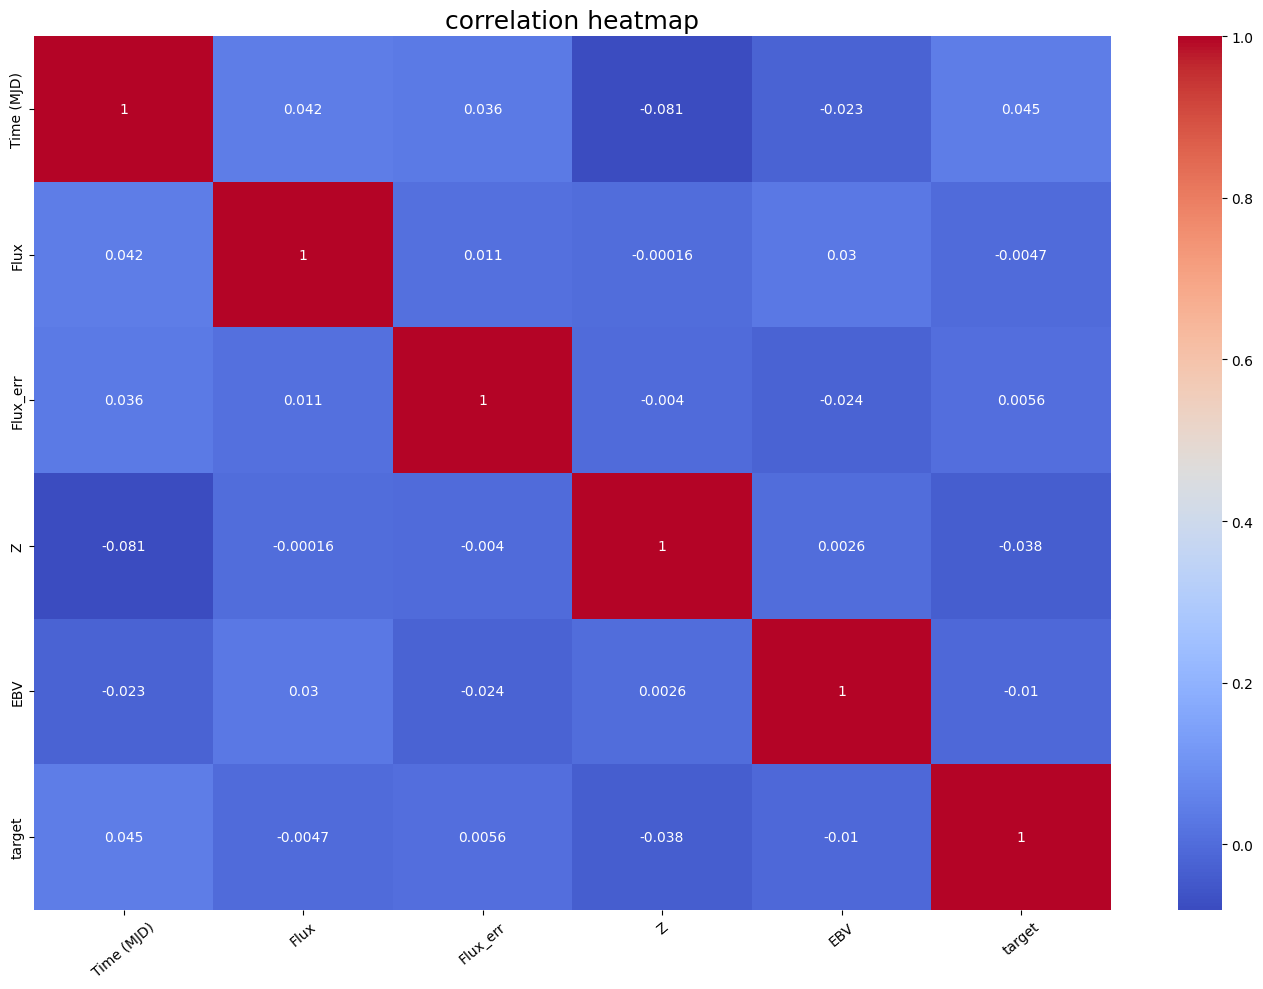

In [ ]:
# Correlation check #

# data.drop(columns=['Z_err', 'English Translation', 'split'])
numeric_data = data.select_dtypes(include=['number'])
numeric_data.drop(inplace=True, columns='Z_err')
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=40)
plt.title("correlation heatmap", fontsize=18)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(14,10))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.xticks(rotation=40)
# plt.title("Red wine correlation heatmap", fontsize = 18)
# plt.tight_layout()
# plt.show()

In [ ]:
data.target.value_counts(normalize=True)

target
0    0.95027
1    0.04973
Name: proportion, dtype: float64

In [ ]:
data.columns

Index(['object_id', 'Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z', 'Z_err',
       'EBV', 'SpecType', 'English Translation', 'split', 'target'],
      dtype='object')